# Basic training loops

## 1. Setup

In [1]:
import tensorflow as tf

print("The version of Tensorflow: {}".format(tf.__version__))

The version of Tensorflow: 2.4.1


## 2. Solving machine learning problems

## 3. Data

In [2]:
# The actual line
TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 1000

# A vector of random x values
x = tf.random.normal(shape=[NUM_EXAMPLES])

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES])

# Calculate y
y = x * TRUE_W + TRUE_B + noise

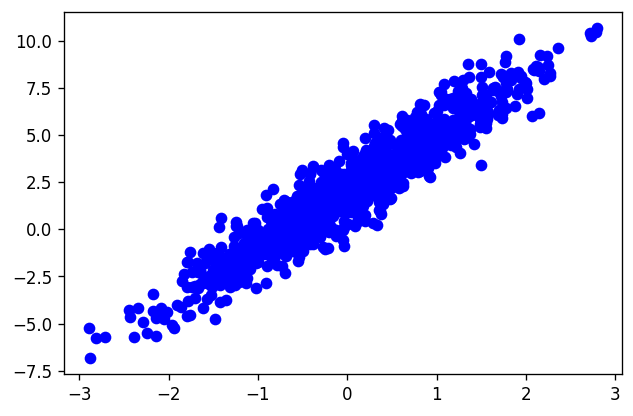

In [5]:
# Plot all the data
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6, 4), dpi=120)
plt.scatter(x, y, c="b")
plt.show()

## 4. Define the model

In [6]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be randomly initialized
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x):
    return self.w * x + self.b

model = MyModel()

# List the variables tf.modules's built-in variable aggregation.
print("Variables:", model.variables)

# Verify the model works
assert model(3.0).numpy() == 15.0

Variables: (<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=5.0>)


### i. Define a loss function

In [7]:
# A loss function measures how well the output of a model for a given input matches the target output. 
# The goal is to minimize this difference during training. Define the standard L2 loss, also known as the "mean squared" error:

# This computes a single loss value for an entire batch
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

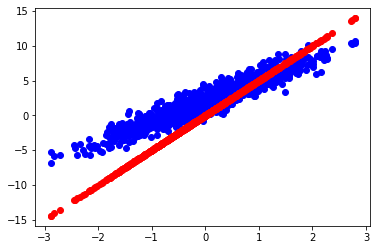

Current loss: 8.732404


In [8]:
# Before training the model, 
# you can visualize the loss value by plotting the model's predictions in red and the training data in blue:

plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(y, model(x)).numpy())

### ii. Define a training loop

In [9]:
# For this example, you can train the model using gradient descent.

# There are many variants of the gradient descent scheme that are captured in tf.keras.optimizers. 
# But in the spirit of building from first principles, 
# here you will implement the basic math yourself with the help of tf.GradientTape for automatic differentiation 
# and tf.assign_sub for decrementing a value (which combines tf.assign and tf.sub):


# Given a callable model, inputs, outputs, and a learning rate...
def train(model, x, y, learning_rate):

  with tf.GradientTape() as t:
    # Trainable variables are automatically tracked by GradientTape
    current_loss = loss(y, model(x))

  # Use GradientTape to calculate the gradients with respect to W and b
  dw, db = t.gradient(current_loss, [model.w, model.b])

  # Subtract the gradient scaled by the learning rate
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

In [13]:
# or a look at training, you can send the same batch of x an y through the training loop, and see how W and b evolve.

model = MyModel()

# Collect the history of W-values and b-values to plot later
Ws, bs = [], []
epochs = range(10)

# Define a training loop
def training_loop(model, x, y):

  for epoch in epochs:
    # Update the model with the single giant batch
    train(model, x, y, learning_rate=0.1)

    # Track this before I update
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    current_loss = loss(y, model(x))

    print("Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f" %
          (epoch, Ws[-1], bs[-1], current_loss))

Starting: W=5.00 b=0.00, loss=8.73240
Epoch  0: W=4.64 b=0.39, loss=6.12895
Epoch  1: W=4.34 b=0.71, loss=4.39637
Epoch  2: W=4.09 b=0.97, loss=3.24312
Epoch  3: W=3.89 b=1.18, loss=2.47536
Epoch  4: W=3.72 b=1.35, loss=1.96415
Epoch  5: W=3.59 b=1.48, loss=1.62370
Epoch  6: W=3.47 b=1.60, loss=1.39694
Epoch  7: W=3.38 b=1.69, loss=1.24588
Epoch  8: W=3.31 b=1.76, loss=1.14524
Epoch  9: W=3.24 b=1.82, loss=1.07818


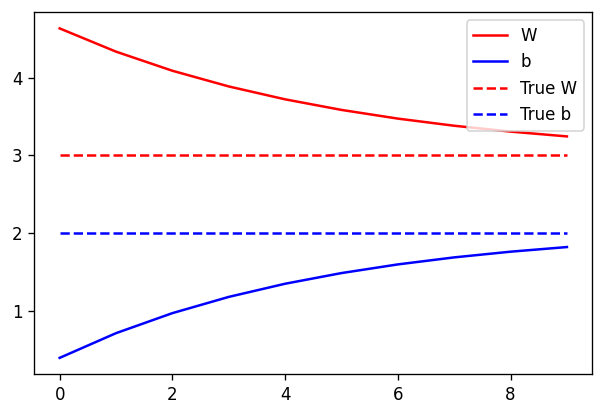

In [14]:
print("Starting: W=%1.2f b=%1.2f, loss=%2.5f" %
      (model.w, model.b, loss(y, model(x))))

# Do the training
training_loop(model, x, y)

# Plot it
plt.figure(figsize=(6, 4), dpi=120)
plt.plot(epochs, Ws, "r",
         epochs, bs, "b")

plt.plot([TRUE_W] * len(epochs), "r--",
         [TRUE_B] * len(epochs), "b--")

plt.legend(["W", "b", "True W", "True b"])
plt.show()

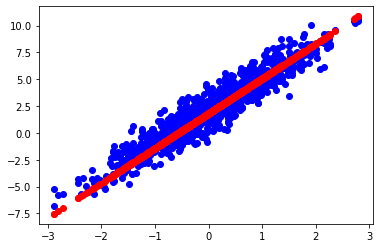

Current loss: 1.078179


In [15]:
# Visualize how the trained model performs
plt.scatter(x, y, c="b")
plt.scatter(x, model(x), c="r")
plt.show()

print("Current loss: %1.6f" % loss(model(x), y).numpy())

## 5. The same solution, but with Keras

In [16]:
class MyModelKeras(tf.keras.Model):
  def __init__(self, **kwargs):
    super().__init__(**kwargs)
    # Initialize the weights to `5.0` and the bias to `0.0`
    # In practice, these should be randomly initialized
    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def call(self, x):
    return self.w * x + self.b

keras_model = MyModelKeras()

# Reuse the training loop with a Keras model
training_loop(keras_model, x, y)

# You can also save a checkpoint using Keras's built-in support
keras_model.save_weights("my_checkpoint")

Epoch  0: W=4.64 b=0.39, loss=6.12895
Epoch  1: W=4.34 b=0.71, loss=4.39637
Epoch  2: W=4.09 b=0.97, loss=3.24312
Epoch  3: W=3.89 b=1.18, loss=2.47536
Epoch  4: W=3.72 b=1.35, loss=1.96415
Epoch  5: W=3.59 b=1.48, loss=1.62370
Epoch  6: W=3.47 b=1.60, loss=1.39694
Epoch  7: W=3.38 b=1.69, loss=1.24588
Epoch  8: W=3.31 b=1.76, loss=1.14524
Epoch  9: W=3.24 b=1.82, loss=1.07818


In [17]:
keras_model = MyModelKeras()

# compile sets the training parameters
keras_model.compile(
    # By default, fit() uses tf.function().  You can
    # turn that off for debugging, but it is on now.
    run_eagerly=False,

    # Using a built-in optimizer, configuring as an object
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),

    # Keras comes with built-in MSE error
    # However, you could use the loss function
    # defined above
    loss=tf.keras.losses.mean_squared_error,
)

In [18]:
# Keras fit expects batched data or a complete dataset as a NumPy array. 
# NumPy arrays are chopped into batches and default to a batch size of 32.

# In this case, to match the behavior of the hand-written loop, 
# you should pass x in as a single batch of size 1000.


print(x.shape[0])
keras_model.fit(x, y, epochs=10, batch_size=1000)

1000
Epoch 1/10
1/1 [==============================] - 0s 198ms/step - loss: 8.7324
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 6.1290
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 4.3964
Epoch 4/10
1/1 [==============================] - 0s 997us/step - loss: 3.2431
Epoch 5/10
1/1 [==============================] - 0s 2ms/step - loss: 2.4754
Epoch 6/10
1/1 [==============================] - 0s 2ms/step - loss: 1.9641
Epoch 7/10
1/1 [==============================] - 0s 2ms/step - loss: 1.6237
Epoch 8/10
1/1 [==============================] - 0s 998us/step - loss: 1.3969
Epoch 9/10
1/1 [==============================] - 0s 2ms/step - loss: 1.2459
Epoch 10/10
1/1 [==============================] - 0s 2ms/step - loss: 1.1452


# reference

### https://tensorflow.google.cn/guide/basic_training_loops